In [2]:
#s1 choose binary classification data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")  # Use actual filename after downloading from Kaggle

# Drop unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Convert target to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [3]:
#s2 train/test split features

# Split into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
#s3 fit logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


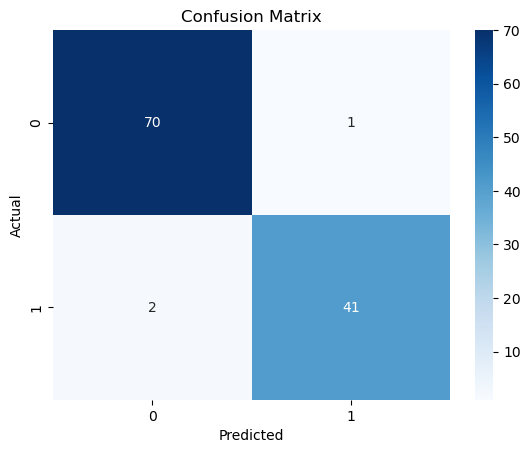

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


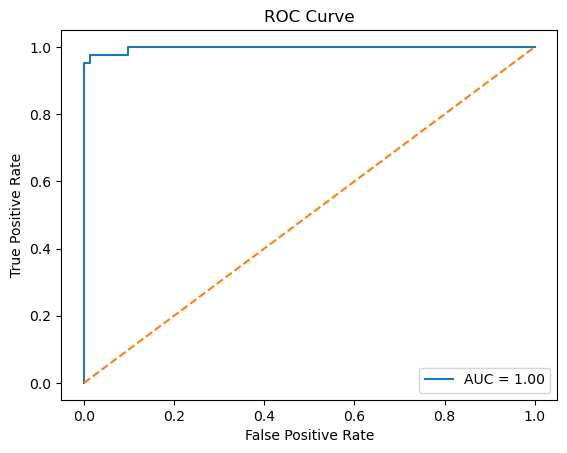

In [5]:
#s4 Evaluation metrics

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC
y_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


[[67  4]
 [ 1 42]]


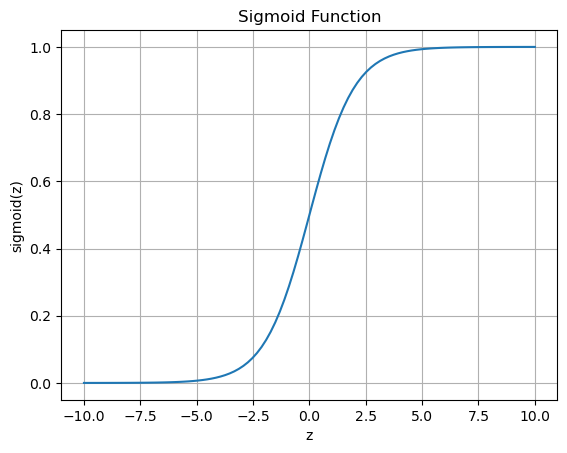

In [6]:
#s5 tuning threshold

# Default threshold is 0.5; try changing it
custom_threshold = 0.3
y_custom = (y_proba >= custom_threshold).astype(int)
print(confusion_matrix(y_test, y_custom))

# Sigmoid function explanation
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()
